# 가이드라인
- (필수) 위에서부터 순차적으로 실행해서 내려가시면 됩니다.
- 인사이트 반영 부분은 복합연산자를 사용했기 때문에<br>
    실행할수록 중복으로 반영됩니다. 가급적 한 번만 실행해 주세요.<br>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time, datetime
warnings.filterwarnings('ignore')

### 아래 가이드에 따라서 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

거래 번호
- id : 1 ~ 10000번 일련번호 - 개시 후 1만 건의 거래가 있었고 걍 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.


In [2]:
# 뭐 매출이 감소했는데 고가제품 때문이었더라~
# 어느 시즌에 매출이 몰렸다, 이 기회를 잘 활용하자~ 등등

- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜


- 두 해의 날짜를 연별로 랜덤하게 생성하는 걸 만들어서 거래 년도에 해당하는 날짜를 랜덤하게 적용
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

In [35]:
ID = pd.Series(np.arange(1,10001),name='거래번호')

# 고객 데이터프레임 customer
#np.random.seed(0)
cusno = pd.Series(np.arange(1,1001),name='cusno')
gender = pd.Series(np.random.randint(0,2,1000),name='gender')
age = pd.Series(np.random.randint(1,81,1000),name='age')
region = pd.Series(np.random.randint(1,11,1000),name='region')
customer = pd.concat((cusno,gender,age,region),axis=1)

# 거래 데이터프레임 data
# 구매일/시간/구매가격/구매물품코드/상품구분/구매량
df = customer.sample(n=10000,replace=True).set_index(ID)
# 시간 관련
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2021-12-31')
date = pd.date_range(start,end,freq="D")
date2 = date.to_frame(index=False) # 인덱스 떼고 데이터프레임화
df['date'] = date2.sample(10000,replace=True).set_index(ID)
df['timedata'] = pd.to_datetime(df.date)
# date는 단순 문자 시리즈였지면 이 작업을 해주면 DateTime index로 써 먹을 수 있다!
df['Year'] = df.timedata.dt.year
df['Month'] = df.timedata.dt.month
df['Day'] = df.timedata.dt.day
df['time'] = pd.Series(np.random.randint(1,25,10001))
df.drop('date',axis=1,inplace=True)

# 요일 관련
def days(y,m,d):
    dli=['MON','TUE','WED','THU','FRI','SAT','SUN']
    return dli[datetime.date(y,m,d).weekday()]
df['Day'] = df.apply(lambda x:days(x['Year'],x['Month'],x['Day']),axis=1)

# 거래 관련
df['price'] = pd.Series(np.random.randint(10,500,10001)*100,name='price')
df['product'] = pd.cut(df['price'],
                bins=3,
                labels = [30,20,10])
df['quantity'] = pd.Series(np.random.randint(1,101,10001))
df['총 구매액'] = df.price*df.quantity
display(df)

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
1,952,1,68,8,2021-02-20,2021,2,SAT,19,3200,30,32,102400
2,222,0,24,7,2020-03-16,2020,3,MON,12,39500,10,68,2686000
3,662,0,74,1,2021-01-16,2021,1,SAT,14,21300,20,14,298200
4,405,0,14,8,2021-09-17,2021,9,FRI,16,41200,10,6,247200
5,476,1,30,5,2020-12-30,2020,12,WED,13,12900,30,17,219300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,224,1,71,6,2020-08-05,2020,8,WED,7,48000,10,32,1536000
9997,275,0,51,8,2021-07-20,2021,7,TUE,20,30200,20,46,1389200
9998,242,1,34,5,2020-11-22,2020,11,SUN,17,29900,20,52,1554800


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   cusno     10000 non-null  int32         
 1   gender    10000 non-null  int32         
 2   age       10000 non-null  int32         
 3   region    10000 non-null  int32         
 4   timedata  10000 non-null  datetime64[ns]
 5   Year      10000 non-null  int64         
 6   Month     10000 non-null  int64         
 7   Day       10000 non-null  object        
 8   time      10000 non-null  int32         
 9   price     10000 non-null  int32         
 10  product   10000 non-null  category      
 11  quantity  10000 non-null  int32         
 12  총 구매액     10000 non-null  int32         
dtypes: category(1), datetime64[ns](1), int32(8), int64(2), object(1)
memory usage: 713.0+ KB


두 데이터프레임을 합칠 때에<br>
고객 데이터에서 랜덤 행을 가져와서 1만개의 관측치를 채우고<br>
고객넘버/성별/나이/지역/구매일/시간/구매물품코드/구매가격/구매량 으로 묶는 게 보기 좋을 듯<br>
구매물품코드는 빈을 써서 3등분하고 라벨을 10,20,30으로 붙이자

In [4]:
# df에서 연도별로 나눠보자.
df1 = df.copy()
display(df1[df1.Year==2020].head(),df1[df1.Year==2021].head())

# 2020년 총 정리
print(f"2020년 총 판매 액수: {df1.loc[df1.Year==2020,'총 구매액'].sum()}원")
print(f"2020년 총 판매 건수: {len(df1.loc[df1.Year==2020])}건")
# 2021년 총 정리
print(f"2021년 총 판매 액수: {df1.loc[df1.Year==2021,'총 구매액'].sum()}원")
print(f"2020년 총 판매 건수: {len(df1.loc[df1.Year==2021])}건")

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
3,173,0,10,5,2020-09-07,2020,9,MON,15,31900,20,54,1722600
5,257,1,1,10,2020-06-03,2020,6,WED,10,27300,20,47,1283100
7,722,1,10,5,2020-01-17,2020,1,FRI,15,16800,30,81,1360800
12,473,0,19,4,2020-05-19,2020,5,TUE,24,37500,10,13,487500
14,982,1,76,2,2020-05-01,2020,5,FRI,22,5600,30,69,386400


,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
1,459,0,79,6,2021-08-09,2021,8,MON,14,15100,30,82,1238200
2,729,0,56,1,2021-03-02,2021,3,TUE,13,37600,10,69,2594400
4,764,0,36,4,2021-01-21,2021,1,THU,2,8300,30,25,207500
6,726,0,77,8,2021-11-24,2021,11,WED,21,29900,20,66,1973400
8,834,1,27,8,2021-01-14,2021,1,THU,5,9200,30,45,414000


2020년 총 판매 액수: 6374062300원
2020년 총 판매 건수: 4970건
2021년 총 판매 액수: 6453223900원
2020년 총 판매 건수: 5030건


In [5]:
# 2020년 중 가장 판매액이 높았던 달을 찾아볼까?
df2020 = df1[df1.Year==2020]
display(df2020.head(3))
bestm = []
for i in range(1,13):
    bestm.append(df2020.loc[df2020.Month==i,'총 구매액'].sum())
bestm2 = np.array(bestm)
print(f'{bestm.index(bestm2.max())+1}월, 총 판매액 {bestm2.max()}원')

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
3,173,0,10,5,2020-09-07,2020,9,MON,15,31900,20,54,1722600
5,257,1,1,10,2020-06-03,2020,6,WED,10,27300,20,47,1283100
7,722,1,10,5,2020-01-17,2020,1,FRI,15,16800,30,81,1360800


5월, 총 판매액 572031700원


In [6]:
# 고객 넘버 16번은 2년 동안 얼마나 구매했을까?
print(f"{len(df[df.cusno==16])}회 구매, {df.loc[df.cusno==16,'총 구매액'].sum()}원")
df[df.cusno==16]

13회 구매, 15504700원


,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
515,16,0,21,9,2020-04-23,2020,4,THU,7,2000,30,75,150000
643,16,0,21,9,2020-05-13,2020,5,WED,19,1500,30,51,76500
734,16,0,21,9,2020-02-27,2020,2,THU,13,13900,30,16,222400
1649,16,0,21,9,2020-09-14,2020,9,MON,4,35600,10,58,2064800
2516,16,0,21,9,2021-12-13,2021,12,MON,11,15500,30,59,914500
2890,16,0,21,9,2021-02-14,2021,2,SUN,15,36700,10,92,3376400
3856,16,0,21,9,2021-03-16,2021,3,TUE,7,43800,10,59,2584200
3923,16,0,21,9,2020-01-23,2020,1,THU,14,48100,10,41,1972100
4485,16,0,21,9,2021-03-25,2021,3,THU,2,10700,30,14,149800


In [7]:
# 2021년 중 가장 판매액이 높았던 달을 찾아볼까?
df2021 = df1[df1.Year==2021]
display(df2021.head(3))
bestm = []
for i in range(1,13):
    bestm.append(df2021.loc[df2021.Month==i,'총 구매액'].sum())
bestm2 = np.array(bestm)
print(f'{bestm.index(bestm2.max())+1}월, 총 판매액 {bestm2.max()}원')

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
거래번호,,,,,,,,,,,,,
1,459,0,79,6,2021-08-09,2021,8,MON,14,15100,30,82,1238200
2,729,0,56,1,2021-03-02,2021,3,TUE,13,37600,10,69,2594400
4,764,0,36,4,2021-01-21,2021,1,THU,2,8300,30,25,207500


2월, 총 판매액 562099900원


In [8]:
# 매해 어느 시간대에 가장 구매 건 수가 많았을까?
bestt = []
for i in range(1,25):
    bestt.append(len(df2020.loc[df2020.time==i]))
bestt2 = np.array(bestt)
print(f'{bestt.index(bestt2.max())+1}시, 총 거래 건수 {bestt2.max()}건')

bestt = []
for i in range(1,25):
    bestt.append(len(df2021.loc[df2021.time==i]))
bestt2 = np.array(bestt)
print(f'{bestt.index(bestt2.max())+1}시, 총 거래 건수 {bestt2.max()}건')

11시, 총 거래 건수 235건
1시, 총 거래 건수 240건


In [9]:
# 그루핑을 수행해 보자
# 연령대의 범주화 선행

def agecat(age):
    cat = ''
    if age<10: cat='아동'
    elif age<20: cat='10대'
    elif age<=30: cat='20대'
    elif age<=40: cat='30대'
    elif age<=50: cat='40대'
    elif age<=60: cat='50대'
    elif age<=60: cat='60대'
    else: cat='노년층'
    return cat
df20 = df2020.copy()
df20.drop(['cusno','region'],axis=1,inplace=True)
df20['age'] = df20.age.apply(lambda x:agecat(x))
df20
gr20 = df20.groupby(['gender','age','product'])
gr20.mean().head()
# 랜덤 수를 뽑다보니 아무래도 평균 값은 중앙에 가깝게 나온다 ㅋㅋ

Year     Month       time         price   quantity  \
gender age product                                                         
0      10대 30       2020.0  6.693548  11.879032   8958.064516  52.653226   
           20       2020.0  6.774775  12.720721  25727.027027  52.261261   
           10       2020.0  7.174312  13.009174  42077.064220  45.550459   
       20대 30       2020.0  6.574627  12.917910   9472.388060  49.634328   
           20       2020.0  6.368852  12.368852  26283.606557  46.147541   

                           총 구매액  
gender age product                
0      10대 30       4.551306e+05  
           20       1.339199e+06  
           10       1.929762e+06  
       20대 30       4.544582e+05  
           20       1.219394e+06

코로나 때문에 구매 시간의 변동이 생겼다.<br>
라고 했을 때 구매 시간의 비중을 늘리는 게 아니라<br>
해당 구매 시간에 있었던 컬럼을 쫙 뽑아! 그 다음에 거기 구매갯수 늘려!<br>
함수 자체의 확률을 바꾸라는 게 아니라 내가 뽑고 싶은 구간의 데이터를 뽑은 다음<br>
내 입맛에 맞게 결과값만 바꾸라는 뜻임

#### 1. 코시국 에디션
    - 영업 제한: 8월~11월 평일 오후 9시(21시) 이후 구매 수량 60% 축소
    - 보복 소비: 12월 고가품목(10) 구매수량 150% 증대
    - 재난지원금: 9월 중/저가품목(20,30) 구매수량 300% 증대
#### 2. 옳게 된 소비
    - 주말 특수: 주말 오후 4~7시 전체 구매수량 기존값의 140%로 바꾸기
    - 경제 권력층: 전체 30대~50대 구매수량 170% 증대, 10대 전체 구매수량 70% 축소
#### 3. 시즈널 이펙트
    - 민족대명절: 2월, 9월 30세 이상 여성 고가품목 구매 수량 300% 증대
    - 곧 휴가철입니다: 7,8월 20대~40대 전체 구매수량 150% 증대
    - 신학기 경험치 2배: 3월 10대 중/고가품목 구매수량 140% 증대
#### 4. 인생의 쓴맛
    - I HATE MONDAYS: 전체 월요일 구매수량 50% 축소
    - 미미은행 발 위조지폐: 아동 범주 대상 전체 구매수량 5%로 축소
    - 못 살 이유는 딱히 없지만: 10대 대상 전체 고가품목 구매 수량 50% 축소
    - 심야영업 안 해요: 오전 9시 이전, 오후 11시 이후 구매수량 50% 축소
#### 5. 그냥 넣고 싶었어
    - 4월은 내 생일: 4월 16일 30대 여성(1) 고가품목(10) 구매수량 400% 증대


In [10]:
# 작업을 위한 전처리
# 만들어둔 데이트타임 인덱스를 인덱스로 붙이고 날짜순으로 정렬

mydf = df.copy()
mydf.set_index(mydf.timedata,inplace=True)
mydf.sort_index(ascending=True, inplace=True)
mydf

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
timedata,,,,,,,,,,,,,
2020-01-01,522,0,21,5,2020-01-01,2020,1,WED,23,12900,30,11,141900
2020-01-01,814,0,42,3,2020-01-01,2020,1,WED,3,37700,10,88,3317600
2020-01-01,972,1,19,5,2020-01-01,2020,1,WED,6,44800,10,50,2240000
2020-01-01,587,0,7,1,2020-01-01,2020,1,WED,14,7100,30,91,646100
2020-01-01,127,0,65,1,2020-01-01,2020,1,WED,18,38400,10,40,1536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,693,1,33,2,2021-12-31,2021,12,FRI,1,43600,10,63,2746800
2021-12-31,745,1,60,10,2021-12-31,2021,12,FRI,5,47200,10,77,3634400
2021-12-31,18,1,34,4,2021-12-31,2021,12,FRI,11,13500,30,45,607500


In [11]:
# 1. 코시국 에디션
# - 영업 제한: 8월~11월 평일 오후 9시(21시) 이후 구매 수량 60% 축소
# - 보복 소비: 12월 고가품목(10) 구매수량 150% 증대
# - 재난지원금: 9월 중/저가품목(20,30) 구매수량 300% 증대
mydf.loc[(mydf.Month>=8)&(mydf.Month<=11)&(mydf.time>=21),'quantity'] *=0.6 #(적용 ㅇㅋ)
mydf.loc[(mydf.Month==12)&(mydf['product']==10),'quantity']*=1.5 #(적용 ㅇㅋ)
mydf.loc[(mydf.Month==9)&(mydf['product']==30)|(mydf['product']==20),'quantity']*=3 #(적용 ㅇㅋ)

# 2. 옳게 된 소비
# - 주말 특수: 주말 오후 4~7시 전체 구매수량 기존값의 140%로 바꾸기
# - 경제 권력층: 전체 30대~50대 구매수량 170% 증대, 10대 전체 구매수량 70% 축소
mydf.loc[((mydf.Day=='SAT')|(mydf.Day=='SUN'))&(mydf.time>=16)&(mydf.time<=19),'quantity']*=1.4
mydf.loc[(mydf.age>=30)&(mydf.age<60),'quantity']*=1.7
mydf.loc[(mydf.age>=10)&(mydf.age<20),'quantity']*=0.7

# 3. 시즈널 이펙트
# - 민족대명절: 2월, 9월 30세 이상 여성 고객 고가품목 구매 수량 300% 증대
# - 곧 휴가철입니다: 7,8월 20대~40대 전체 구매수량 150% 증대
# - 신학기 경험치 2배: 3월 10대 중/고가품목 구매수량 140% 증대
mydf.loc[((mydf.Month==2)|(mydf.Month==9))&(mydf.age>=30)&(mydf.gender==1),'quantity']*=3
mydf.loc[((mydf.Month==7)|(mydf.Month==8))&(mydf.age>=20)&(mydf.age<50),'quantity']*=1.5
mydf.loc[((mydf['product']==10)|(mydf['product']==20))
         &(mydf.Month==3)&(mydf.age>=10)&(mydf.age<20),'quantity']*=1.4

# 4. 인생의 쓴맛
# - I HATE MONDAYS: 전체 월요일 구매수량 50% 축소
# - 미미은행 발 위조지폐: 아동 범주 대상 전체 구매수량 5%로 축소
# - 못 살 이유는 딱히 없지만: 10대 대상 전체 고가품목 구매 수량 50% 축소
# - 심야영업 안 해요: 오전 9시 이전, 오후 11시 이후 구매수량 50% 축소
mydf.loc[(mydf.Day=='MON'),'quantity']*=0.5
mydf.loc[(mydf.age<10),'quantity']*=0.05
mydf.loc[(mydf['product']==10)&(mydf.age>=10)&(mydf.age<20),'quantity']*=0.5
mydf.loc[(mydf.time<=9)|(mydf.time>=23),'quantity'] *=0.5

# 5. 그냥 넣고 싶었어
# - 4월은 내 생일: 4월 16일 30대 여성(1) 고가품목(10) 구매수량 400% 증대
mydf.loc[(mydf.age>=30)&(mydf.age<40)&(mydf.gender==1)
         &((mydf.index=='2020-04-16')|(mydf.index=='2021-04-16')),'quantity']*=4
mydf.quantity = mydf.quantity.astype(int)
mydf['총 구매액'] = mydf.price*mydf.quantity # 총 구매액 갱신
mydf

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
timedata,,,,,,,,,,,,,
2020-01-01,522,0,21,5,2020-01-01,2020,1,WED,23,12900,30,5,64500
2020-01-01,814,0,42,3,2020-01-01,2020,1,WED,3,37700,10,74,2789800
2020-01-01,972,1,19,5,2020-01-01,2020,1,WED,6,44800,10,8,358400
2020-01-01,587,0,7,1,2020-01-01,2020,1,WED,14,7100,30,4,28400
2020-01-01,127,0,65,1,2020-01-01,2020,1,WED,18,38400,10,40,1536000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,693,1,33,2,2021-12-31,2021,12,FRI,1,43600,10,80,3488000
2021-12-31,745,1,60,10,2021-12-31,2021,12,FRI,5,47200,10,57,2690400
2021-12-31,18,1,34,4,2021-12-31,2021,12,FRI,11,13500,30,76,1026000


In [12]:
mydf.loc['2020-04-16']

,cusno,gender,age,region,timedata,Year,Month,Day,time,price,product,quantity,총 구매액
timedata,,,,,,,,,,,,,
2020-04-16,710,0,9,10,2020-04-16,2020,4,THU,7,7400,30,1,7400
2020-04-16,743,0,69,10,2020-04-16,2020,4,THU,11,43800,10,95,4161000
2020-04-16,810,0,74,8,2020-04-16,2020,4,THU,22,8400,30,20,168000
2020-04-16,303,1,61,10,2020-04-16,2020,4,THU,4,39900,10,31,1236900
2020-04-16,391,0,14,4,2020-04-16,2020,4,THU,11,18100,20,205,3710500
2020-04-16,84,0,27,8,2020-04-16,2020,4,THU,23,48600,10,1,48600
2020-04-16,435,1,69,7,2020-04-16,2020,4,THU,2,48800,10,20,976000
2020-04-16,900,0,56,3,2020-04-16,2020,4,THU,2,49700,10,76,3777200
2020-04-16,596,1,21,10,2020-04-16,2020,4,THU,7,17600,20,147,2587200


In [13]:
data = mydf.loc[:,['gender','age','Year','Month','Day',
               'time','price','product','quantity','총 구매액']]
gr = data.groupby(['Year','Month'])
gr.mean().head()

gender        age       time         price    quantity  \
Year Month                                                             
2020 1      0.456731  40.016827  12.846154  24379.807692   72.009615   
     2      0.496278  41.228288  11.851117  24526.799007  123.836228   
     3      0.456954  39.289183  12.156733  24200.220751   65.037528   
     4      0.526829  41.480488  12.331707  24815.121951   67.765854   
     5      0.491879  41.178654  12.573086  25656.612529   74.109049   

                   총 구매액  
Year Month                
2020 1      1.733358e+06  
     2      3.262676e+06  
     3      1.630558e+06  
     4      1.670250e+06  
     5      1.896503e+06

In [14]:
# 연령대 범주화
def agecat(age):
    cat = ''
    if age<10: cat='아동'
    elif age<20: cat='10대'
    elif age<30: cat='20대'
    elif age<40: cat='30대'
    elif age<50: cat='40대'
    elif age<60: cat='50대'
    elif age<70: cat='60대'
    else: cat='노년층'
    return cat
data['age'] = data.age.apply(lambda x:agecat(x))

In [15]:
gr = data.groupby(['Year','age'])
gr.mean().round(3)
# 전체적으로 구매액이 30~50대에서 높게 나온다.

gender  Month    time      price  quantity        총 구매액
Year age                                                         
2020 10대   0.486  6.492  12.229  24444.096    42.172   960039.013
     20대   0.381  6.528  12.447  24960.708    64.509  1577155.481
     30대   0.501  6.665  12.536  25623.133   129.678  3227022.404
     40대   0.493  6.537  12.528  25518.091   133.006  3333369.516
     50대   0.579  6.354  12.121  26497.949   127.256  3286377.778
     60대   0.430  6.443  12.010  24918.805    75.761  1844592.128
     노년층   0.443  6.318  12.367  25601.085    69.913  1787967.597
     아동    0.486  6.619  12.632  25433.641     2.542    63401.294
2021 10대   0.465  6.479  12.310  25041.076    39.394   918709.773
     20대   0.390  6.475  12.544  25361.318    69.639  1759865.372
     30대   0.460  6.248  12.655  24701.460   132.177  3292846.350
     40대   0.531  6.237  12.492  25934.143   138.480  3530313.050
     50대   0.571  6.665  12.582  25121.599   134.757  3233696.259
     60대   0.454  6.677  12.363  25106.552    73.977  1849638.690
     노년층   0.411  6.302  12.301  25867.622    72.953  1761200.000
     아동    0.545  6.532  12.831  25769.398     2.734    70196.656

In [16]:
# 연도별 나이 - 구매시기 상관관계
pv1 = pd.pivot_table(data,
                     index = ['Year','age'], # 행 위치에 들어갈 열
                     columns = 'Month', # 열 위치에 들어갈 열
                     values = '총 구매액', # 데이터로 사용할 열
                     aggfunc = 'mean' # 데이터 집계 함수
                     ).round(3)
pv1
# 10대의 3월 소비금액이 커졌다. 이건 내가 신학기 변인을 넣었기 때문
# 40대, 50대의 2월 소비금액이 눈에 띄게 커졌다. 이거 성별로 나눠서 봐야 할 듯
# 9월은 명절 보정 + 재난지원금 보정 때문에 구매금액이 폭발적으로 늘어남

Month              1            2            3            4            5   \
Year age                                                                    
2020 10대  1081100.000   666905.357  1251022.059  1187607.843   940967.308   
     20대  1551017.308  1527829.167  1482036.207  1337702.439  1263070.690   
     30대  2179641.176  5096452.381  2752086.842  2399132.653  3405935.000   
     40대  2564281.356  5375302.128  2689043.548  2631454.098  3670005.172   
     50대  2953462.745  7641861.702  2198064.912  1923516.981  2728000.000   
     60대  1712175.926  2967273.846  1405854.098  1570637.931  1552616.981   
     노년층  1421541.176  3329787.273  1486085.455  1777207.407  1703905.970   
     아동     91086.364    53653.488    65440.741    53483.721    47838.776   
2021 10대   924323.729  1069826.316  1054467.213   847882.143   841446.154   
     20대  2035703.846  1687045.652  1293400.000  1019000.000  1570551.111   
     30대  2776939.655  4614725.000  3036409.434  2749371.429  2843070.588   
     40대  2455258.730  4783848.214  3236390.323  2861894.737  3220773.333   
     50대  2993883.721  5364271.739  2282787.755  2577326.531  2484425.532   
     60대  1526192.593  3156509.524  1292454.545  1487106.522  1573134.043   
     노년층  1931087.719  2851138.667  1052892.453  1467978.462  1485551.020   
     아동     82677.778    76404.545    68873.333    60889.796    70960.000   

Month              6            7            8            9            10  \
Year age                                                                    
2020 10대   900225.000  1006689.091   849204.839  1000750.000   621357.500   
     20대  1862390.566  1727170.968  3042506.977  1224177.778  1426256.250   
     30대  2352164.286  4814362.500  2976651.429  5883639.583  2548207.547   
     40대  3054167.213  3315682.540  3212659.091  5262941.176  2618668.421   
     50대  3018525.000  3020703.922  1869074.000  7809556.410  1895038.182   
     60대  1564587.719  1649411.538  1782515.000  2818471.186  1688384.615   
     노년층  1330183.019  1396596.721  1696017.857  3302117.021  1566876.667   
     아동     61630.303    87741.176    49644.444    63835.849    55468.750   
2021 10대   846896.296  1039515.385   625014.286   747062.903  1073032.727   
     20대  1271930.233  1771296.226  3352087.234  1464750.000  2227604.255   
     30대  2844483.333  3671416.000  3732789.583  5690165.116  2096388.372   
     40대  3417435.593  5038052.083  3574349.123  6299255.319  2575206.522   
     50대  4172038.776  2648435.000  1801375.000  5460305.000  3112625.424   
     60대  2080562.791  2029056.364   951853.704  3597250.847  1307570.588   
     노년층  1390651.786  1307138.571  1501518.750  2969674.576  1534052.174   
     아동     63512.000    78976.744    43752.083    61758.696    72987.500   

Month              11           12  
Year age                            
2020 10대   927163.793   968264.179  
     20대  1054218.033  1750365.455  
     30대  1966017.308  2632994.118  
     40대  2903203.846  3386546.154  
     50대  2499908.571  3276256.604  
     60대  1568563.934  1652724.074  
     노년층  1080228.000  1440111.111  
     아동     59314.035    76097.872  
2021 10대   942382.759  1005196.552  
     20대  1648326.923  1985661.905  
     30대  2733933.333  3112491.892  
     40대  2451360.714  3080731.250  
     50대  2664338.095  2765425.000  
     60대  1516488.889  1953667.742  
     노년층  1249889.796  1980020.000  
     아동     71933.333    88661.224

In [17]:
# 월별 남녀 소비금액 비교

data1 = data.loc[:,['gender','age','Month',
               'price','product','quantity','총 구매액']]
gr = data1.groupby(['Month','gender'])
for i,j in gr:
    display(i,j.head())
    print(f"{j['총 구매액'].sum()}원")
# 위에서 의문을 품었던 2, 9월 소비금액 증대는
# 여성 고객이 남성 고객에 비해 거의 3배쯤 소비를 더 많이 해서 나온 결과임(실제 증가한 값도 300%)
# 휴가 시즌, 홀리데이 시즌엔 남녀 구분 없이 구매금액이 늘어남 - 시즈널 이펙트

(1, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-01-01,0,20대,1,12900,30,5,64500
2020-01-01,0,40대,1,37700,10,74,2789800
2020-01-01,0,아동,1,7100,30,4,28400
2020-01-01,0,60대,1,38400,10,40,1536000
2020-01-01,0,20대,1,7600,30,51,387600


736875800원


(1, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-01-01,1,10대,1,44800,10,8,358400
2020-01-01,1,40대,1,8200,30,158,1295600
2020-01-01,1,10대,1,34600,10,33,1141800
2020-01-01,1,30대,1,11300,30,86,971800
2020-01-01,1,60대,1,42400,10,40,1696000


786024800원


(2, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-02-01,0,10대,2,46300,10,20,926000
2020-02-01,0,30대,2,18900,20,28,529200
2020-02-01,0,노년층,2,38300,10,62,2374600
2020-02-01,0,노년층,2,10900,30,36,392400
2020-02-01,0,아동,2,22600,20,6,135600


733820200원


(2, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-02-01,1,40대,2,23400,20,91,2129400
2020-02-01,1,60대,2,35700,10,48,1713600
2020-02-01,1,노년층,2,47400,10,87,4123800
2020-02-01,1,60대,2,21100,20,639,13482900
2020-02-01,1,60대,2,13100,30,105,1375500


1750175100원


(3, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-03-01,0,10대,3,43900,10,16,702400
2020-03-01,0,50대,3,39300,10,130,5109000
2020-03-01,0,20대,3,17200,30,8,137600
2020-03-01,0,60대,3,25600,20,54,1382400
2020-03-01,0,아동,3,28200,20,0,0


823451900원


(3, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-03-01,1,40대,3,14100,30,218,3073800
2020-03-01,1,50대,3,41500,10,95,3942500
2020-03-01,1,10대,3,8100,30,71,575100
2020-03-01,1,60대,3,23300,20,255,5941500
2020-03-01,1,60대,3,26200,20,226,5921200


658983500원


(4, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-04-01,0,노년층,4,3300,30,53,174900
2020-04-01,0,아동,4,47900,10,1,47900
2020-04-01,0,10대,4,34000,10,4,136000
2020-04-01,0,10대,4,8300,30,25,207500
2020-04-01,0,아동,4,13000,30,1,13000


616986900원


(4, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-04-01,1,30대,4,49800,10,59,2938200
2020-04-01,1,노년층,4,35000,10,100,3500000
2020-04-01,1,10대,4,5600,30,22,123200
2020-04-01,1,20대,4,11100,30,50,555000
2020-04-01,1,50대,4,46700,10,40,1868000


746098600원


(5, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-05-01,0,60대,5,32800,20,27,885600
2020-05-01,0,50대,5,18500,20,7,129500
2020-05-01,0,노년층,5,49100,10,20,982000
2020-05-01,0,60대,5,49100,10,40,1964000
2020-05-01,0,10대,5,16000,30,26,416000


767739900원


(5, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-05-01,1,노년층,5,5600,30,69,386400
2020-05-01,1,50대,5,17300,30,19,328700
2020-05-01,1,30대,5,36100,10,132,4765200
2020-05-01,1,40대,5,47100,10,39,1836900
2020-05-02,1,40대,5,13000,30,66,858000


779600200원


(6, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-06-01,0,30대,6,15200,30,66,1003200
2020-06-01,0,50대,6,47900,10,20,958000
2020-06-01,0,노년층,6,33700,10,45,1516500
2020-06-01,0,40대,6,15000,30,16,240000
2020-06-01,0,40대,6,4100,30,18,73800


801648900원


(6, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-06-01,1,10대,6,49400,10,5,247000
2020-06-01,1,40대,6,6100,30,10,61000
2020-06-01,1,60대,6,24900,20,127,3162300
2020-06-01,1,20대,6,39300,10,30,1179000
2020-06-01,1,30대,6,47300,10,14,662200


728557000원


(7, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-07-01,0,60대,7,31500,20,45,1417500
2020-07-01,0,60대,7,38100,10,7,266700
2020-07-01,0,60대,7,32400,20,12,388800
2020-07-01,0,10대,7,23700,20,189,4479300
2020-07-02,0,10대,7,12800,30,26,332800


993438700원


(7, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-07-01,1,노년층,7,14600,30,23,335800
2020-07-01,1,30대,7,15800,30,153,2417400
2020-07-01,1,50대,7,33100,20,249,8241900
2020-07-01,1,30대,7,49400,10,7,345800
2020-07-01,1,10대,7,23800,20,10,238000


782725500원


(8, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-08-01,0,60대,8,13300,30,26,345800
2020-08-01,0,60대,8,28700,20,243,6974100
2020-08-01,0,20대,8,29600,20,516,15273600
2020-08-01,0,60대,8,22000,20,120,2640000
2020-08-01,0,60대,8,48100,10,56,2693600


815512100원


(8, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-08-01,1,60대,8,30800,20,113,3480400
2020-08-01,1,아동,8,19000,20,4,76000
2020-08-01,1,40대,8,39100,10,113,4418300
2020-08-01,1,10대,8,23300,20,56,1304800
2020-08-01,1,40대,8,3100,30,95,294500


800083100원


(9, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-09-01,0,아동,9,41500,10,0,0
2020-09-01,0,노년층,9,12600,30,99,1247400
2020-09-01,0,10대,9,23700,20,42,995400
2020-09-01,0,60대,9,5400,30,138,745200
2020-09-01,0,30대,9,38200,10,49,1871800


735901400원


(9, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-09-01,1,30대,9,1700,30,474,805800
2020-09-01,1,50대,9,23300,20,780,18174000
2020-09-01,1,50대,9,41500,10,97,4025500
2020-09-01,1,50대,9,5500,30,841,4625500
2020-09-01,1,60대,9,37800,10,108,4082400


1942346900원


(10, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-10-01,0,40대,10,49400,10,86,4248400
2020-10-01,0,아동,10,40600,10,2,81200
2020-10-01,0,60대,10,16900,30,47,794300
2020-10-01,0,20대,10,11700,30,50,585000
2020-10-01,0,40대,10,32800,20,22,721600


667279400원


(10, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-10-01,1,50대,10,40600,10,130,5278000
2020-10-01,1,노년층,10,4100,30,1,4100
2020-10-02,1,노년층,10,36800,10,39,1435200
2020-10-02,1,50대,10,17300,30,55,951500
2020-10-02,1,20대,10,43000,10,27,1161000


719168200원


(11, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-11-01,0,아동,11,43400,10,2,86800
2020-11-01,0,20대,11,7200,30,69,496800
2020-11-01,0,60대,11,48300,10,92,4443600
2020-11-01,0,아동,11,40700,10,0,0
2020-11-01,0,40대,11,36100,10,61,2202100


703933400원


(11, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-11-01,1,노년층,11,45100,10,3,135300
2020-11-01,1,아동,11,24900,20,0,0
2020-11-01,1,60대,11,6000,30,77,462000
2020-11-01,1,노년층,11,38100,10,30,1143000
2020-11-01,1,노년층,11,16400,30,19,311600


537248600원


(12, 0)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-12-01,0,10대,12,42600,10,40,1704000
2020-12-01,0,10대,12,21800,20,65,1417000
2020-12-01,0,60대,12,7300,30,23,167900
2020-12-01,0,60대,12,26200,20,45,1179000
2020-12-01,0,노년층,12,48800,10,42,2049600


852976300원


(12, 1)

,gender,age,Month,price,product,quantity,총 구매액
timedata,,,,,,,
2020-12-01,1,30대,12,42900,10,216,9266400
2020-12-01,1,아동,12,17800,20,3,53400
2020-12-01,1,아동,12,28500,20,0,0
2020-12-01,1,노년층,12,41400,10,6,248400
2020-12-02,1,40대,12,19400,20,464,9001600


763796500원


In [18]:
df416 = data[(data.gender==1)&(data.Month==4)&(data.age=='30대')]
df416.drop(['Year','time','gender','Month'],axis=1,inplace=True)
df416['일자'] = df416.index
df416['일자'] = df416.일자.dt.day
gr416 = df416.groupby(['일자'])
gr416.mean().round(3).head(50)
# 4월 16일 가중치를 열심히 넣었지만 눈에 띄게 늘어나진 않았다. 그래도 다른 날보다 높은 구매액이긴 함

,price,quantity,총 구매액
일자,,,
1,31600.000,23.667,1.069400e+06
2,18000.000,191.000,3.438000e+06
3,20900.000,45.000,1.525167e+06
4,3300.000,5.000,1.650000e+04
5,33350.000,10.000,2.211500e+05
6,30000.000,70.000,1.824500e+06
7,21800.000,130.000,2.834000e+06
8,19900.000,28.000,3.867000e+05
9,14066.667,88.667,2.164167e+06


In [19]:
# 연도별 시간대-요일간 상관관계
# 왜 니맘대로 요일을 정렬하니 ㅠㅠ
pv1 = pd.pivot_table(data,
                     index = 'time', # 행 위치에 들어갈 열
                     columns = 'Day', # 열 위치에 들어갈 열
                     values = ['총 구매액','quantity'], # 데이터로 사용할 열
                     aggfunc = 'mean' # 데이터 집계 함수
                     ).round(3)
pv1

# 월요일은 전체적으로 침체된 소비 패턴
# 시간대에선 영업시간 보정을 넣었기 때문에 그때부터 본격적인 구매량 증가
# 주말은 랜덤임을 감안해도 가중치가 있어서 전체적으로 높은 소비 금액을 보이고 있다


quantity                                                       \
Day       FRI     MON      SAT      SUN      THU      TUE      WED   
time                                                                 
1      53.450  32.833   39.772   43.817   49.919   62.100   75.338   
2      64.614  22.241   48.293   48.082   58.871   59.618   54.707   
3      74.290  29.964   54.373   48.079   62.101   61.000   45.643   
4      57.909  26.164   48.038   70.960   70.327   59.185   58.533   
5      58.476  25.419   53.192   51.741   60.255   54.627   60.064   
6      51.300  21.327   56.754   59.176   63.308   69.290   53.345   
7      54.440  26.812   49.561   64.196   61.671   38.794   37.735   
8      65.467  22.404   58.350   71.906   44.970   49.311   54.188   
9      45.000  28.917   56.567   76.677   61.721   42.415   64.121   
10    124.607  67.894  129.569   88.795  130.922  112.971  137.210   
11     95.702  67.250   95.259   70.381  135.616  138.236  102.968   
12     90.517  58.721  153.188  129.169  111.288  103.233  120.642   
13    119.508  47.271  102.327   98.538  120.609  103.460  105.164   
14    101.508  57.106   80.655  138.118  127.887  132.904   77.719   
15    117.500  59.651   92.311  127.763  102.800  109.857  127.463   
16     99.207  67.300  177.862  159.536  108.714   88.855  105.581   
17    107.470  58.103  202.129  164.291  103.460  150.000   88.648   
18    145.981  59.905  153.413  152.259   92.795  103.812   74.818   
19    113.143  48.182  153.169  189.652  127.672  110.825  103.750   
20    119.746  47.031  134.392  137.417  120.758  131.860  120.667   
21    110.476  46.250   76.186   80.089   75.246   86.333  109.360   
22    109.048  48.407  103.092   90.475   93.812   91.719  101.780   
23     43.980  23.898   64.062   59.389   46.368   38.073   45.032   
24     40.673  20.500   45.364   42.450   48.018   41.767   51.576   

            총 구매액                                                      \
Day           FRI          MON          SAT          SUN          THU   
time                                                                    
1     1332138.333   828066.667   863092.982   965328.333  1262908.065   
2     1596401.429   543203.448  1249175.862   984847.541  1454457.143   
3     1944295.161   803445.455  1257998.305  1140204.762  1613392.754   
4     1462027.273   545014.754  1219345.283  1746962.000  1879987.755   
5     1481241.270   649495.161  1118626.923  1323443.103  1542190.196   
6     1273970.000   578671.429  1450054.098  1612823.529  1522089.231   
7     1310692.000   664342.188  1213664.912  1691750.000  1519588.608   
8     1274051.667   515496.154  1348475.000  1944567.188  1282606.061   
9      980906.154   782141.667  1456185.000  1947783.871  1537883.721   
10    3623507.143  1569975.758  2839558.824  2037286.364  3383070.312   
11    2734054.386  1698922.059  2172427.586  1971242.857  3344356.164   
12    2147812.069  1528267.213  3712666.667  3230366.197  2185375.000   
13    3314929.508  1285359.322  2534405.769  2706088.462  2770776.812   
14    2398874.576  1391718.182  2039674.138  3791025.000  3486230.645   
15    2646824.286  1430033.333  2277395.556  3408096.610  2602537.143   
16    2318122.414  1621874.000  4145515.517  3315403.571  2913590.476   
17    2731700.000  1512291.176  5115358.065  4612656.364  2754296.825   
18    3853320.755  1593630.159  3835946.032  3839325.926  2133097.260   
19    2723800.000  1143342.424  4182993.846  4730828.788  3228779.310   
20    3224749.254  1160081.538  3505968.627  3727400.000  3040227.273   
21    2983125.397  1094343.750  1864352.542  2255394.643  1952366.667   
22    2653822.581  1189105.085  2893247.692  2549019.672  2231158.333   
23     948474.000   579177.966  1526647.917  1492077.778  1249647.059   
24     991836.538   504387.500  1151320.000  1006585.000  1177973.684   

                                
Day           TUE          WED  
time                            
1     1329151.667  1598736.364  
2     1267

In [20]:
data.corr() # 변수 간의 상관관계는 눈에 띄게는 없는 듯

,gender,Year,Month,time,price,quantity,총 구매액
gender,1.000000,0.003497,-0.008928,-0.000563,0.013212,0.092283,0.085391
Year,0.003497,1.000000,-0.005726,0.010732,0.000891,0.002547,-0.000199
Month,-0.008928,-0.005726,1.000000,0.006148,0.010462,-0.003878,-0.011646
time,-0.000563,0.010732,0.006148,1.000000,0.002291,0.111607,0.113738
price,0.013212,0.000891,0.010462,0.002291,1.000000,-0.026111,0.220776
quantity,0.092283,0.002547,-0.003878,0.111607,-0.026111,1.000000,0.894589
총 구매액,0.085391,-0.000199,-0.011646,0.113738,0.220776,0.894589,1.000000


In [21]:
# 고객별 세일즈 데이터 만들기

d20 = mydf[mydf.Year==2020]
d21 = mydf[mydf.Year==2021]

dcus = customer.copy()
dcus['sales'] = ''
for i in cusno:
    if (d20.loc[d20.cusno==i,'총 구매액'].sum())>(d21.loc[d21.cusno==i,'총 구매액'].sum()):
        dcus.sales[i-1] = 0
    else: dcus.sales[i-1] = 1
dcus.set_index('cusno',inplace=True)
dcus.tail(10)

,gender,age,region,sales
cusno,,,,
991,0,74,3,0
992,0,59,10,0
993,1,45,2,1
994,0,13,4,0
995,0,21,1,1
996,0,60,3,1
997,1,70,3,0
998,1,12,1,0
999,0,57,2,0


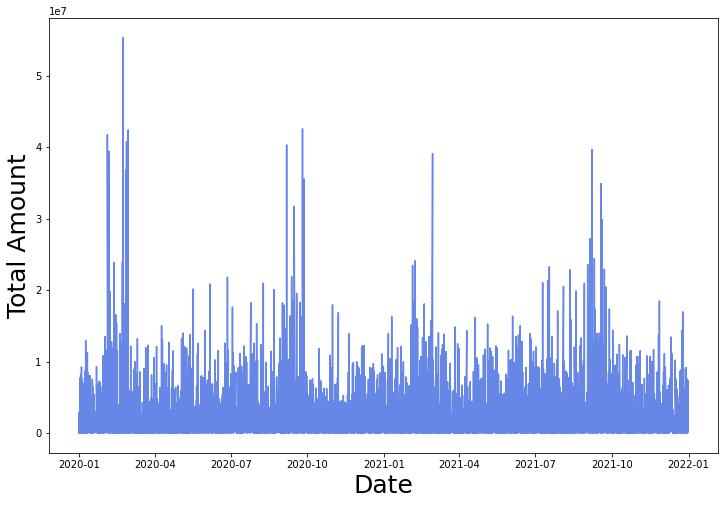

In [22]:
plt.figure(figsize=(12,8))
plt.xlabel('Date', size=25)
plt.ylabel('Total Amount', size=25)
plt.plot(mydf['총 구매액'],color = 'royalblue',alpha=0.8)
# 2월, 9월 소비 큼. 소소하게 여름철에 소비 늘어나는 경향

<BarContainer object of 10000 artists>

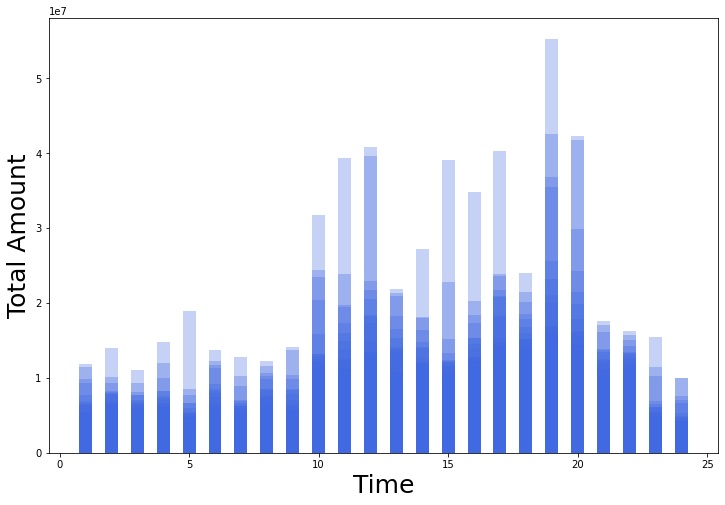

In [33]:
tdf = mydf.sort_values('time')
plt.figure(figsize=(12,8))
plt.xlabel('Time', size=25)
plt.ylabel('Total Amount', size=25)
plt.bar(tdf.time, tdf['총 구매액'],width=0.5,color = 'royalblue',alpha=0.3)
# 영업시간 + 영업제한시간 보정으로 오전 10시부터 오후 8시까지의 소비가 전반적으로 상승
# 알파값을 주어서 그래프의 진한 정도가 소비 밀집 구역이라는 것을 알 수 있다

#### 보완할 점
1. 세일즈 항목을 만들어 고객별로 구매 증감 경향 체크
    - 2020, 2021년도 총 구매액, 구매수량, 품목별 구매수량 체크해보기
2. 데이터 시각화
    - 어떤 데이터를 추리고 버릴지 선택할 줄 알아야 함
3. 만들었으면 써야지?
    - 지역이나 젠더 변수를 좀 더 활용할 수 있기를
    - 구매수량을 늘리는 방법 말고 다른 변수의 출현 확률 조정이 가능할까?

In [23]:
# 해당 고객의 경향은 구매 감소할 것이다 -> 고객 타겟 마케팅 실행
# 해당 시기에 구매가 상승할 것이다 -> 판매 촉진 상품 기획
# 등등 데이터 분석하기에 따라서 솔루션이 충분히 달라질 수 있음
# 결과를 낼 때 종속변수는 제외(??)

# sales를 통해 구매 감소 고객을 리스트업 하고,
# 특징을 찾아 내서 감소가 일어나지 않도록 하는 모델을 세우는 등의 일을 할 수 있게 sales를 만들었던 것
# 사용자 함수를 만들고 전처리과정이나 그런거 주석으로 달아서 확인할 수 있게 습관들이기

# [핵심 항목] 2020년 대비 2021년 매출이 어떻게 변화가 되었는지
# [세부 항목] 변화가 있었다면 어디서 있었는지, 그 이유가 왜일 것 같은가(연령, 시기, 성별, 고객 세부 데이터)
# 사회적 분위기도 충분히 반영할 수 있음. 코시국엔 비대면, 홀리데이 시즌엔 계절 상품 등등

# 1차 프로젝트는 실제 데이터 약 2천 8백만 건을 3주에 걸쳐 분석하고 솔루션까지 도출해야 함
# 다 하지는 못해도 절반치는 분석할 수 있어야 하지 않을까...?
# 가을시즌 구매 감소 고객, 요인, 전에 보니까 입장 채널도 A,B,C 그룹으로 나뉘어 있던데
# 고객 충성도나 재구매율 높이는 방안, 채널 활성화 등등 예시 솔루션도 많았음
# 접근법(통계), 시각화에 대해 집중공부하기